# 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

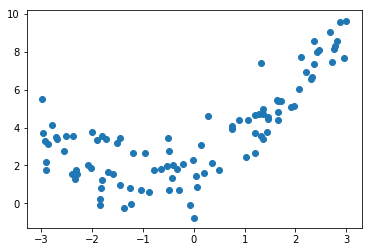

In [3]:
plt.scatter(x, y)

## 过拟合

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [5]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.6532142366794743

In [6]:
X_polt = np.linspace(-3, 3, 100).reshape(100, 1)
y_polt = poly100_reg.predict(X_polt)

[-3, 3, 0, 10]

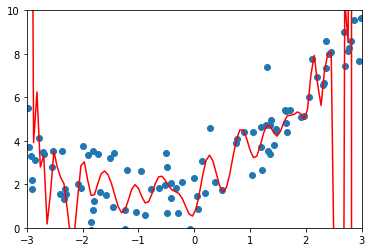

In [7]:
plt.scatter(x, y)
plt.plot(X_polt[:, 0], y_polt, color='r')
plt.axis([-3, 3, 0, 10])

## train test split 的意义

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [10]:
lin2_reg = PolynomialRegression(degree=2)
lin2_reg.fit(X_train, y_train)
y2_predict = lin2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.80356410562979

In [11]:
lin10_reg = PolynomialRegression(degree=10)
lin10_reg.fit(X_train, y_train)
y10_predict = lin10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150786

In [12]:
lin100_reg = PolynomialRegression(degree=100)
lin100_reg.fit(X_train, y_train)
y100_predict = lin100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

117971956713.45403